## N3 Classifier

Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


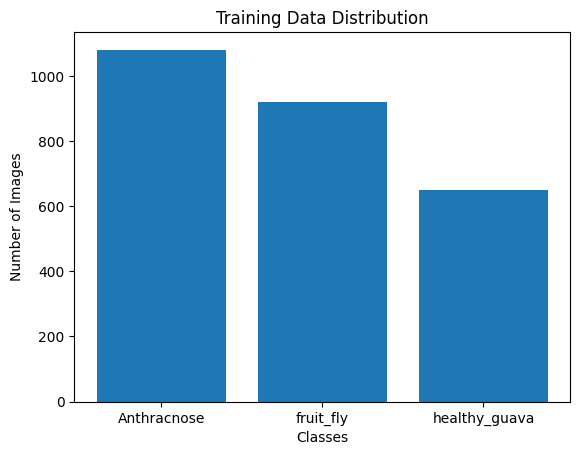

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,371 (165.51 KB)

 Trainable params: 42,371 (165.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 31s 339ms/step - accuracy: 0.4033 - loss: 1.0574 - val_accuracy: 0.5338 - val_loss: 0.9071 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.5625 - loss: 0.8732 - val_accuracy: 0.7139 - val_loss: 0.7537 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.6842 - loss: 0.7390 - val_accuracy: 0.7656 - val_loss: 0.6264 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.7600 - loss: 0.6107 - val_accuracy: 0.7656 - val_loss: 0.5580 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.7867 - loss: 0.5373 - val_accuracy: 0.7510 - val_loss: 0.5457 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.7949 - loss: 0.5185 - val_accuracy: 0.7907 - val_loss: 0.5130 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.8137 - loss: 0.

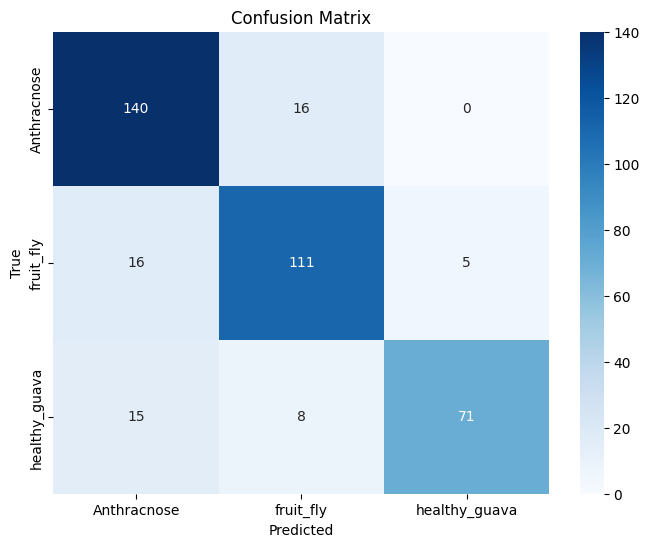

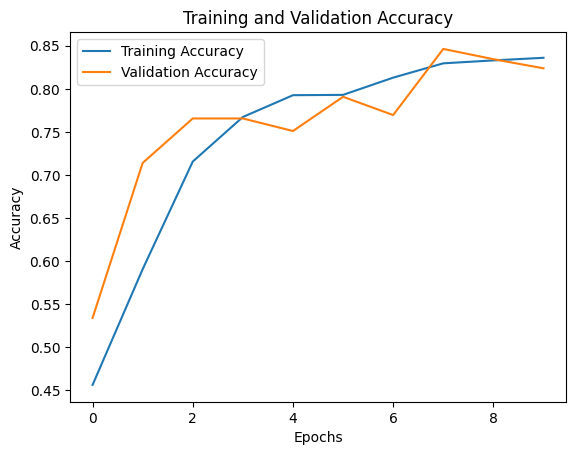

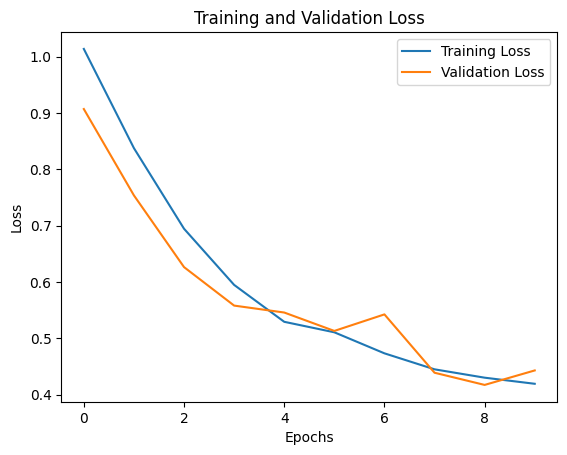

In [9]:
# import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)
# Define a custom CNN block with fusion of DenseNet and Residual connections
def custom_cnn_block(x, filters):
    input_tensor = x
    # DenseNet-like block
    x1 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x1 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x1)
    
    x2 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x2 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(x2)
    
    x = layers.Concatenate()([x1, x2])
    x = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)  # Bottleneck layer
    
    # Residual connection
    shortcut = layers.Conv2D(filters, (1,1), padding='same')(input_tensor)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the model using Functional API
inputs = layers.Input(shape=(img_height, img_width, 3))

# Initial layers
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = inputs
# Custom CNN blocks with increasing filters
# x = custom_cnn_block(x, 64)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 128)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 256)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
# Output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, checkpoint, reduce_lr])
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## WN2 CLassifier

Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


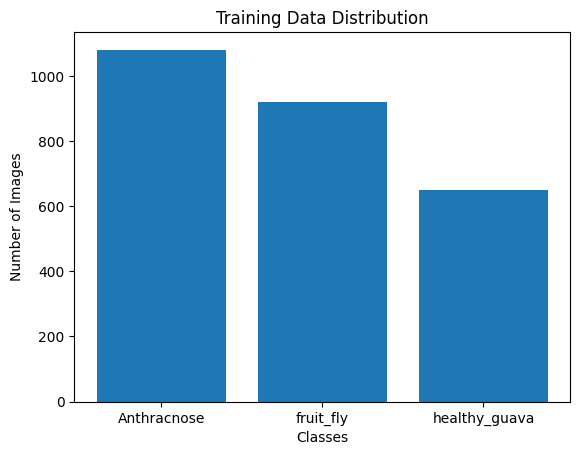

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,307 (134.01 KB)

 Trainable params: 34,307 (134.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 314ms/step - accuracy: 0.4280 - loss: 1.0666 - val_accuracy: 0.5629 - val_loss: 1.0133 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.5194 - loss: 0.9863 - val_accuracy: 0.5921 - val_loss: 0.8838 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - accuracy: 0.6327 - loss: 0.8730 - val_accuracy: 0.6980 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 307ms/step - accuracy: 0.6967 - loss: 0.7773 - val_accuracy: 0.7417 - val_loss: 0.6999 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.7514 - loss: 0.6895 - val_accuracy: 0.7682 - val_loss: 0.6391 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 307ms/step - accuracy: 0.7699 - loss: 0.6222 - val_accuracy: 0.7801 - val_loss: 0.5982 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.7619 - loss: 0.6087 - val_

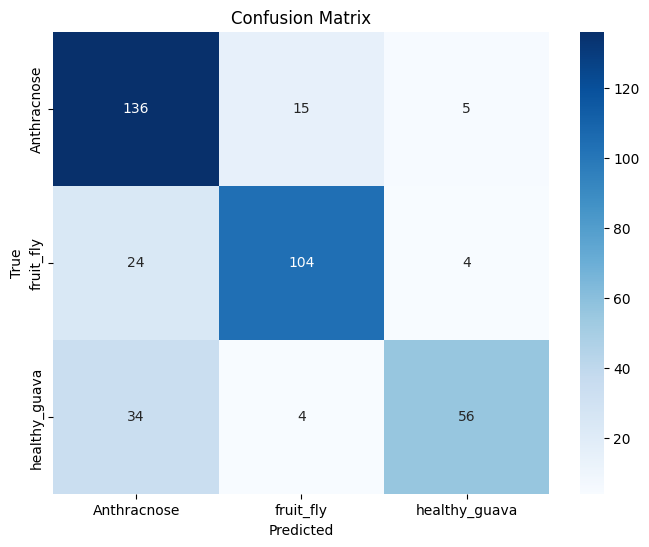

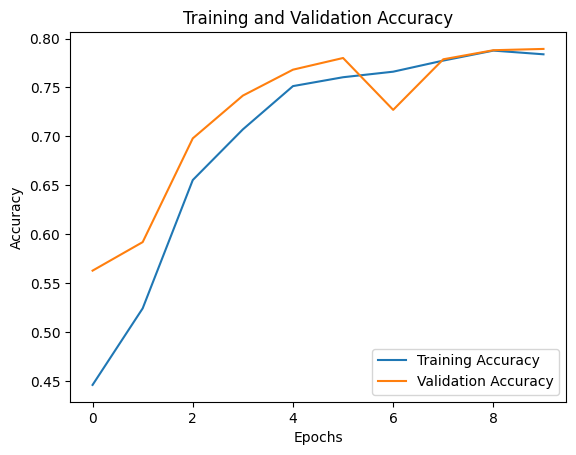

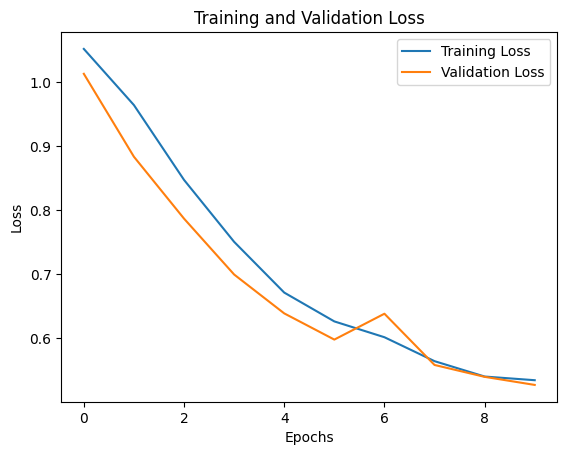

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)
# Define a custom CNN block with fusion of DenseNet and Residual connections
def custom_cnn_block(x, filters):
    input_tensor = x
    # DenseNet-like block
    x1 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x1 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x1)
    
    x2 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x2 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(x2)
    
    x = layers.Concatenate()([x1, x2])
    x = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)  # Bottleneck layer
    
    # Residual connection
    shortcut = layers.Conv2D(filters, (1,1), padding='same')(input_tensor)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the model using Functional API
inputs = layers.Input(shape=(img_height, img_width, 3))

# Initial layers
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = inputs
# # Custom CNN blocks with increasing filters
# x = custom_cnn_block(x, 64)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 128)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 256)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
# Output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_wn2.keras', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, checkpoint, reduce_lr])
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## BN2 Classifier

Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


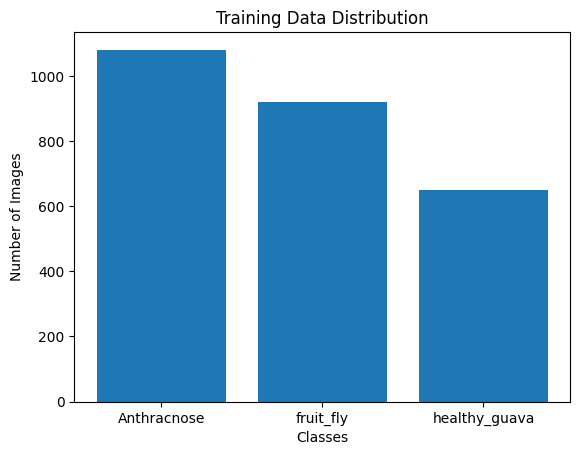

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,331 (138.01 KB)

 Trainable params: 34,819 (136.01 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.6510 - loss: 0.7478 - val_accuracy: 0.5179 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.8165 - loss: 0.4521 - val_accuracy: 0.4093 - val_loss: 1.1274 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.8359 - loss: 0.4127 - val_accuracy: 0.4596 - val_loss: 0.9943 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.8330 - loss: 0.3911 - val_accuracy: 0.4914 - val_loss: 0.9940 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.8231 - loss: 0.4290 - val_accuracy: 0.5748 - val_loss: 0.8393 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - accuracy: 0.8301 - loss: 0.3961 - val_accuracy: 0.6384 - val_loss: 0.7354 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - accuracy: 0.8495 - loss: 0.3608 - val_

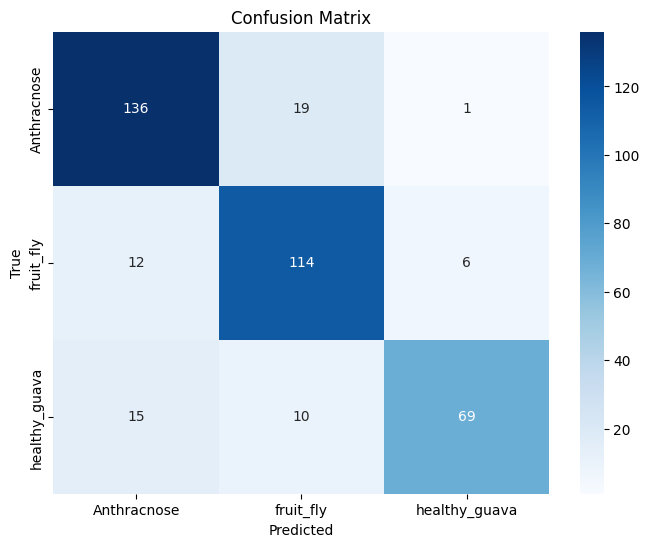

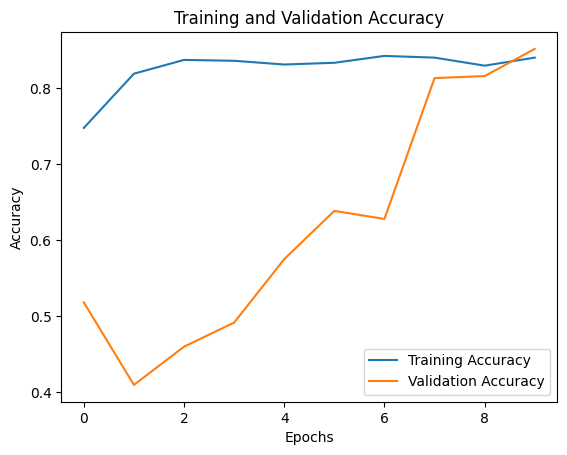

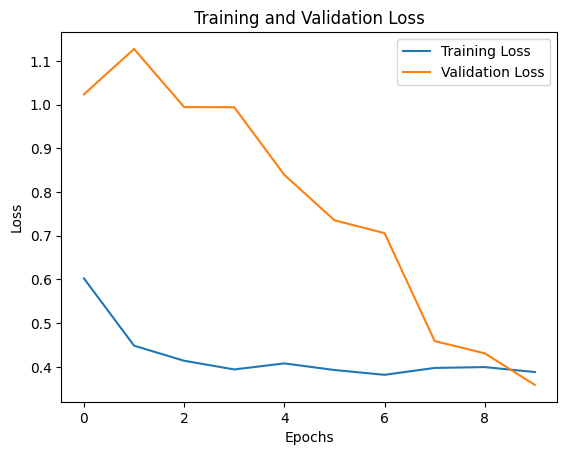

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)
# Define a custom CNN block with fusion of DenseNet and Residual connections
def custom_cnn_block(x, filters):
    input_tensor = x
    # DenseNet-like block
    x1 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x1 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x1)
    
    x2 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x2 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(x2)
    
    x = layers.Concatenate()([x1, x2])
    x = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)  # Bottleneck layer
    
    # Residual connection
    shortcut = layers.Conv2D(filters, (1,1), padding='same')(input_tensor)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the model using Functional API
inputs = layers.Input(shape=(img_height, img_width, 3))

# # Initial layers
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = inputs
# # Custom CNN blocks with increasing filters
# x = custom_cnn_block(x, 64)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 128)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 256)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
# Output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_bn2.keras', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, checkpoint, reduce_lr])
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## MN2 Classifier

Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


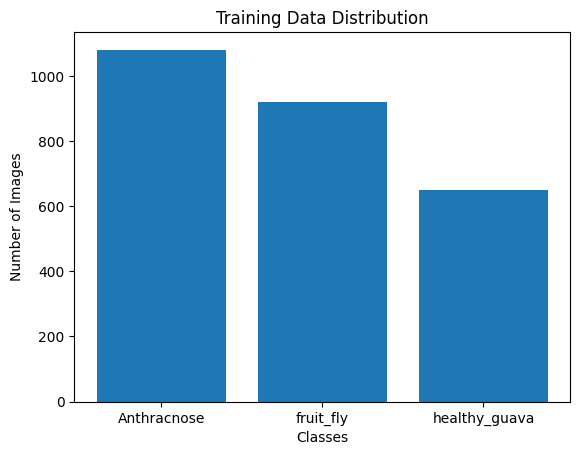

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,307 (134.01 KB)

 Trainable params: 34,307 (134.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 337ms/step - accuracy: 0.3746 - loss: 1.0701 - val_accuracy: 0.4079 - val_loss: 1.0255 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - accuracy: 0.4772 - loss: 1.0133 - val_accuracy: 0.4662 - val_loss: 0.9174 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.5878 - loss: 0.9082 - val_accuracy: 0.5377 - val_loss: 0.8533 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.6404 - loss: 0.8354 - val_accuracy: 0.7470 - val_loss: 0.7269 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.6929 - loss: 0.7480 - val_accuracy: 0.7603 - val_loss: 0.6536 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.7357 - loss: 0.6739 - val_accuracy: 0.7709 - val_loss: 0.6092 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7562 - loss: 0.6261 - val_

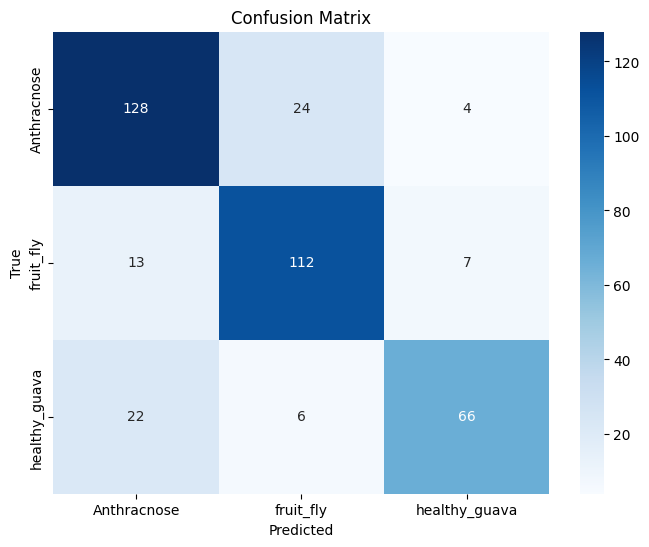

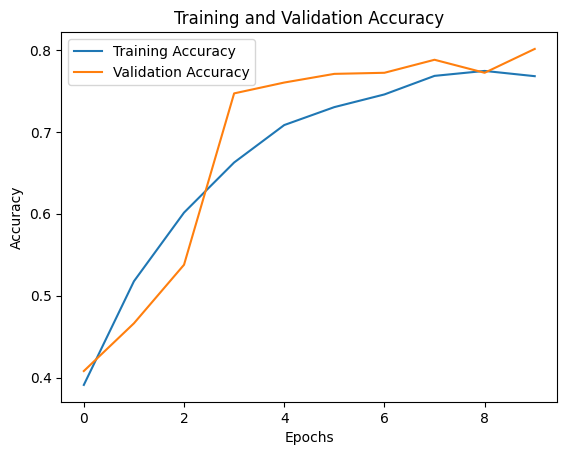

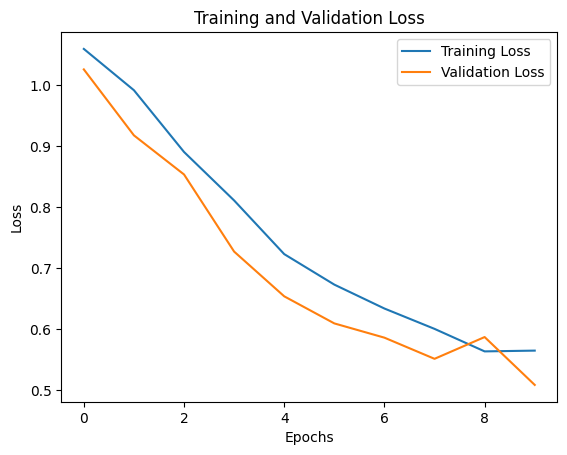

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)
# Define a custom CNN block with fusion of DenseNet and Residual connections
def custom_cnn_block(x, filters):
    input_tensor = x
    # DenseNet-like block
    x1 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x1 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x1)
    
    x2 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x2 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(x2)
    
    x = layers.Concatenate()([x1, x2])
    x = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)  # Bottleneck layer
    
    # Residual connection
    shortcut = layers.Conv2D(filters, (1,1), padding='same')(input_tensor)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the model using Functional API
inputs = layers.Input(shape=(img_height, img_width, 3))

# Initial layers
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = inputs
# #Custom CNN blocks with increasing filters
# x = custom_cnn_block(x, 64)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 128)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 256)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x) 
x = layers.Dense(128, activation='relu')(x)
# Output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_mn2.keras', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, checkpoint, reduce_lr])
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## TN2 Classifier

Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


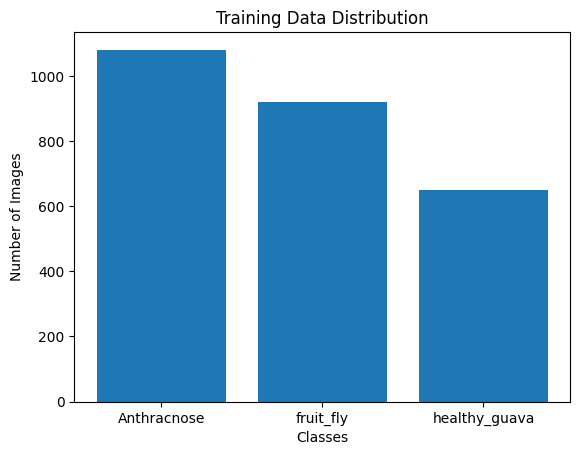

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,963 (35.01 KB)

 Trainable params: 8,963 (35.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - accuracy: 0.3812 - loss: 1.0695 - val_accuracy: 0.3470 - val_loss: 1.0389 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - accuracy: 0.4083 - loss: 1.0293 - val_accuracy: 0.5775 - val_loss: 0.9751 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - accuracy: 0.6381 - loss: 0.9646 - val_accuracy: 0.6980 - val_loss: 0.8802 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.6181 - loss: 0.8933 - val_accuracy: 0.6040 - val_loss: 0.8158 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.6744 - loss: 0.8136 - val_accuracy: 0.7285 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 307ms/step - accuracy: 0.7138 - loss: 0.7503 - val_accuracy: 0.7430 - val_loss: 0.7035 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.7341 - loss: 0.7028 - val_

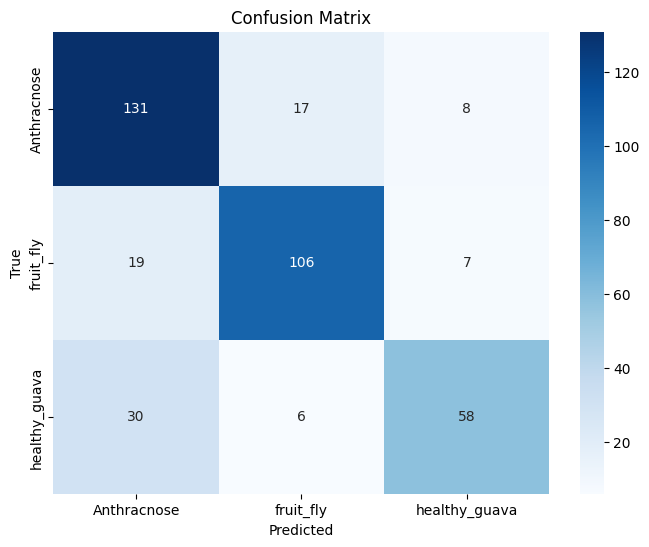

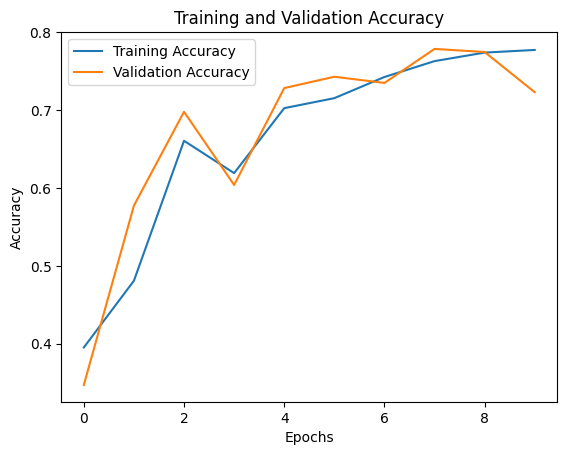

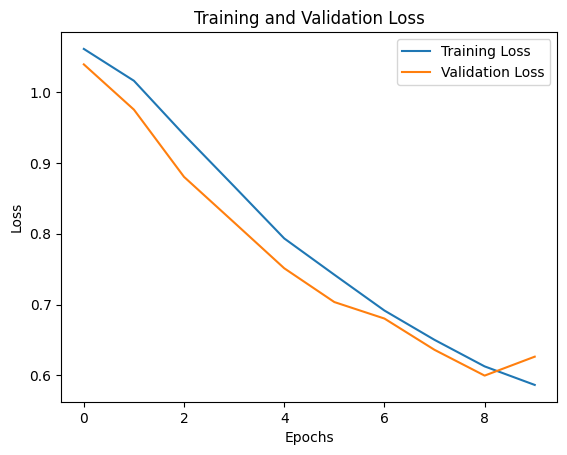

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)
# Define a custom CNN block with fusion of DenseNet and Residual connections
def custom_cnn_block(x, filters):
    input_tensor = x
    # DenseNet-like block
    x1 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x1 = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x1)
    
    x2 = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x2 = layers.Conv2D(filters, (5,5), padding='same', activation='relu')(x2)
    
    x = layers.Concatenate()([x1, x2])
    x = layers.Conv2D(filters, (1,1), padding='same', activation='relu')(x)  # Bottleneck layer
    
    # Residual connection
    shortcut = layers.Conv2D(filters, (1,1), padding='same')(input_tensor)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the model using Functional API
inputs = layers.Input(shape=(img_height, img_width, 3))

# Initial layers
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = inputs
# # Custom CNN blocks with increasing filters
# x = custom_cnn_block(x, 64)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 128)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)

# x = custom_cnn_block(x, 256)
# x = layers.MaxPooling2D(pool_size=(2,2))(x)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
# Output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_tn2.keras', save_best_only=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stopping, checkpoint, reduce_lr])
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()